# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus


## PART 2:
- Republican vs Democrat Tweet Classifier

In [1]:
# Import pandas for data handling
import pandas as pd

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Libraries for helping us with strings
import string
# Regular Expression Library
import re

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report


# Import our metrics to evaluate our model
from sklearn import metrics
from sklearn.metrics import classification_report


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns

# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english') 

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\VTech\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\VTech\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\VTech\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [2]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
news_df = pd.read_csv("data/20-newsgroups.csv")
news_df.shape

(11314, 4)

In [3]:
news_df.head()

,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [4]:
# 3. Inspect / remove nulls and duplicates
news_df.duplicated().sum()
news_df.isnull().sum()


id                0
message           0
topic             0
topic_category    0
dtype: int64

In [5]:
# 4. Find class balances, print out how many of each topic_category there are.
news_df['topic_category'].value_counts(normalize=1)

rec.sport.hockey            0.053032
soc.religion.christian      0.052943
rec.motorcycles             0.052855
rec.sport.baseball          0.052766
sci.crypt                   0.052590
rec.autos                   0.052501
sci.med                     0.052501
comp.windows.x              0.052413
sci.space                   0.052413
comp.os.ms-windows.misc     0.052236
sci.electronics             0.052236
comp.sys.ibm.pc.hardware    0.052148
misc.forsale                0.051706
comp.graphics               0.051617
comp.sys.mac.hardware       0.051087
talk.politics.mideast       0.049850
talk.politics.guns          0.048259
alt.atheism                 0.042425
talk.politics.misc          0.041100
talk.religion.misc          0.033322
Name: topic_category, dtype: float64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
3. Make a function that removes all stopwords.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
4. EXTRA CREDIT (This step only): Make a function that stemms all words. 


5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
    
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [6]:
# 1. Make a function that makes all text lowercase.

def lower_case(in_str):
    return in_str.lower()

test_string = 'This is A SENTENCE with LOTS OF CAPS.'
lower_case(test_string)


'this is a sentence with lots of caps.'

In [7]:
# 2. Make a function that removes all punctuation. 

def remove_punctuation(a_string):    
    a_string = re.sub(r'[^\w\s]','',a_string)
    return a_string

test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

remove_punctuation(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [8]:
# 3. Make a function that removes all stopwords.

def remove_stopwords(in_str):
    string_token = word_tokenize(in_str)
    string_no_stopword = [word for word in string_token if not word in stopwords]
    new_sentence = (" ").join(string_no_stopword)
    return new_sentence

test_string = 'This is a sentence! With some different stopwords i have added in here.'
remove_stopwords(test_string)

'This sentence ! With different stopwords added .'

In [9]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'



In [10]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.

def text_processing(in_str):
    return remove_stopwords(remove_punctuation(lower_case(in_str)))

test_string = 'I played and started playing with players and we all love to play with plays'
text_processing(test_string)

'played started playing players love play plays'

In [11]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 
news_df['message_clean'] = news_df['message'].apply(text_processing)

In [12]:
news_df['message_clean']

0        lerxstwamumdedu wheres thing subject car nntpp...
1        guykuocarsonuwashingtonedu guy kuo subject si ...
2        twillisececnpurdueedu thomas e willis subject ...
3        jgreenamber joe green subject weitek p9000 org...
4        jcmheadcfaharvardedu jonathan mcdowell subject...
                               ...                        
11309    jimzisfeinfactorycom jim zisfein subject migra...
11310    ebodinpearltuftsedu subject screen death mac p...
11311    westesnetcomcom estes subject mounting cpu coo...
11312    stevehcrlgw steven collins subject sphere 4 po...
11313    gunningccocaltechedu kevin j gunning subject s...
Name: message_clean, Length: 11314, dtype: object

# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [13]:
# 1. Define your `X` and `y` data. 

X = news_df['message_clean'].values
y = news_df['topic_category'].values


In [14]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
news_vectorizer = TfidfVectorizer()


In [15]:
# 3. Fit your vectorizer using your X data
news_vectorizer.fit(X)


TfidfVectorizer()

In [16]:
# 4. Transform your X data using your fitted vectorizer. 
X = news_vectorizer.transform(X)


In [17]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print(X.shape)
# 139767 columns

(11314, 139767)


# Split your data into Training and Testing data. 

In [18]:
# Split our data into testing and training like always. 
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=54)

X_train_text = X_train
X_test_text = X_test

___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [19]:
# 1. Initalize an empty model. 
m_nb_model = MultinomialNB(alpha=.05)


In [20]:
# Fit our model with our training data.
m_nb_model.fit(X_train, y_train)



MultinomialNB(alpha=0.05)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [21]:
# 1. Make new predictions of our testing data. 
y_pred = m_nb_model.predict(X_test)



In [22]:
# 2. Print the accuracy of the model. 
accuracy =  m_nb_model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.917366


C:\Users\VTech\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


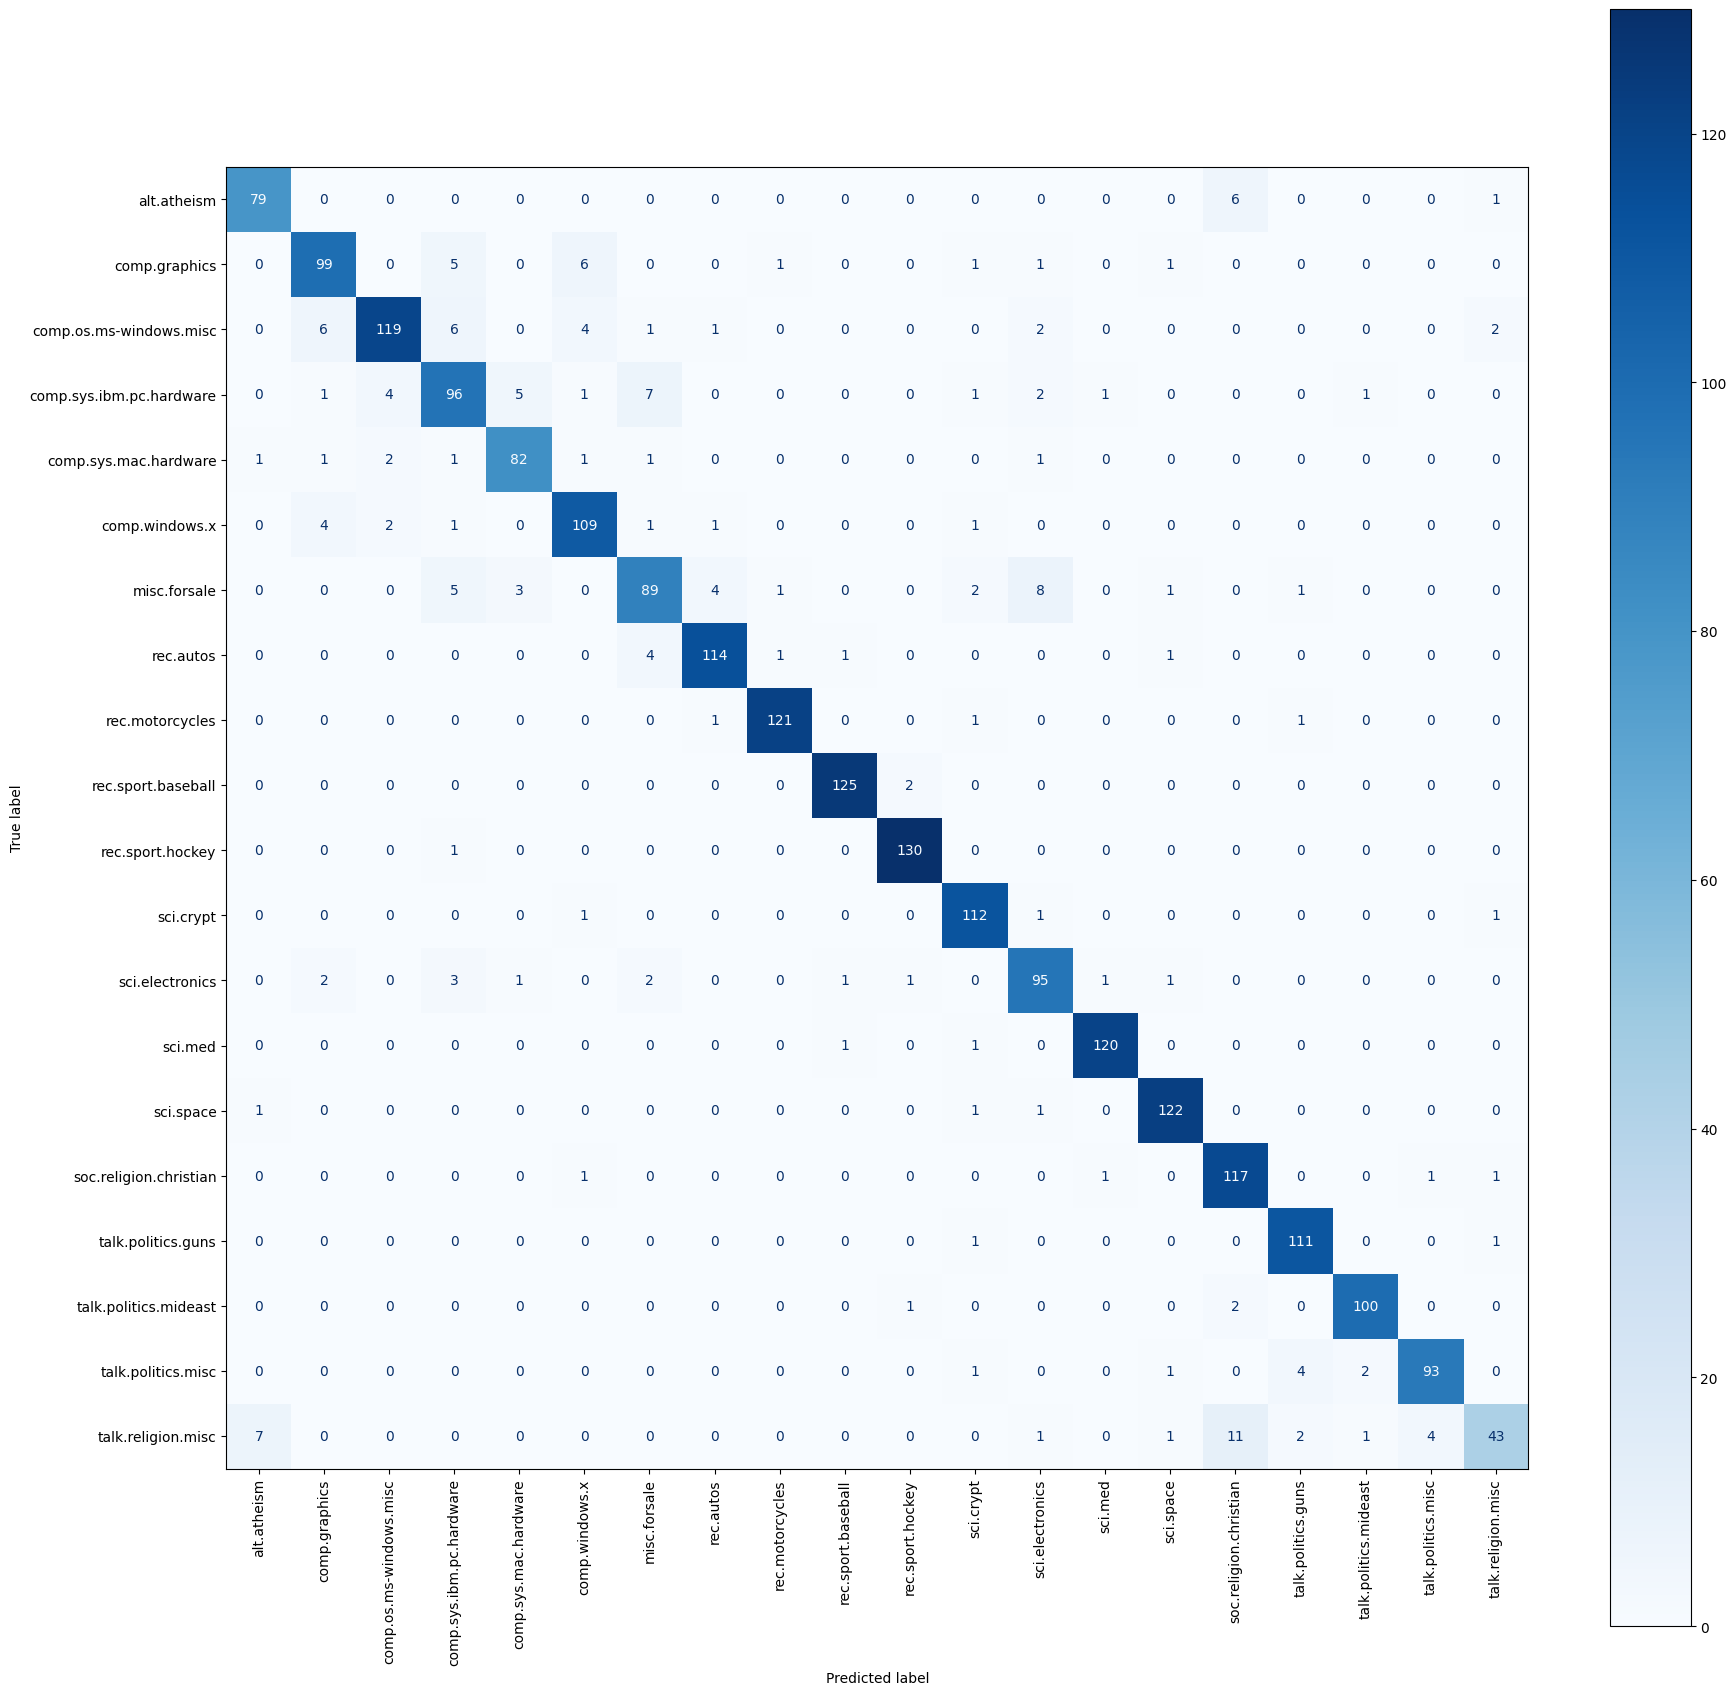

In [23]:
# 3. Plot the confusion matrix of our predictions
fig, ax = plt.subplots(figsize=(21, 21))

disp = plot_confusion_matrix(m_nb_model, X_test, y_test,
                             display_labels=m_nb_model.classes_,
                             cmap=plt.cm.Blues, ax=ax)
plt.xticks(rotation=90)
disp


In [24]:
# 4. Using `classification_report` print the evaluation results for all the classes. 
print(classification_report(y_test, y_pred, target_names=m_nb_model.classes_))


                          precision    recall  f1-score   support

             alt.atheism       0.90      0.92      0.91        86
           comp.graphics       0.88      0.87      0.87       114
 comp.os.ms-windows.misc       0.94      0.84      0.89       141
comp.sys.ibm.pc.hardware       0.81      0.81      0.81       119
   comp.sys.mac.hardware       0.90      0.91      0.91        90
          comp.windows.x       0.89      0.92      0.90       119
            misc.forsale       0.85      0.78      0.81       114
               rec.autos       0.94      0.94      0.94       121
         rec.motorcycles       0.98      0.98      0.98       124
      rec.sport.baseball       0.98      0.98      0.98       127
        rec.sport.hockey       0.97      0.99      0.98       131
               sci.crypt       0.92      0.97      0.95       115
         sci.electronics       0.85      0.89      0.87       107
                 sci.med       0.98      0.98      0.98       122
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [25]:
my_sentence = "We should change how guns are able to be purchased in the US"

# 1. Apply the text pipeline to your sentence
new_sentence = text_processing(my_sentence)
# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`\
X = news_vectorizer.transform([new_sentence])
# 3. Use the model to predict your new `X`. 
m_nb_model.predict(X)
# 4. Print the prediction

array(['talk.politics.guns'], dtype='<U24')

___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [26]:
from sklearn.metrics import confusion_matrix, roc_auc_score, f1_score
import numpy as np

#A list of keys for the dictionary returned by p1_metrics
metric_keys = ['f1','accuracy','sensitivity','specificity', 'precision']

def p1_metrics(y_true,y_pred,include_cm=True):
    cm = confusion_matrix(y_true,y_pred)
    tn, fp, fn, tp = cm.ravel()
    if include_cm:
        return {
            'f1': f1_score(y_true,y_pred, pos_label='Democrat'),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp),
            'confusion_matrix': cm}
    else:
        return {
            'f1': f1_score(y_true,y_pred),
            'accuracy': (tp+tn)/np.sum(cm),
            'sensitivity': tp/(tp+fn),
            'specificity': tn/(tn+fp),
            'precision': tp/(tp+fp)}

In [27]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')
print(df.shape)



(86460, 3)


In [28]:
df.head()

,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [29]:
df['tweet_cleaned'] = df['Tweet'].apply(text_processing)

In [30]:
df['tweet_cleaned']

0        today senate dems vote savetheinternet proud s...
1        rt winterhavensun winter resident alta vista t...
2        rt nbclatino repdarrensoto noted hurricane mar...
3        rt nalcabpolicy meeting repdarrensoto thanks t...
4        rt vegalteno hurricane season starts june 1st ...
                               ...                        
86455    check oped need end executive overreach act wh...
86456    yesterday betty amp great time learning forest...
86457    forever grateful service sacrifice major barne...
86458    happy first day school cobbschools cobbbacktos...
86459    zika fears realized florida house gop acted pr...
Name: tweet_cleaned, Length: 86460, dtype: object

In [31]:
X = df['tweet_cleaned'].values
y = df['Party'].values

In [32]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X)

TfidfVectorizer()

In [33]:
X = vectorizer.transform(X)
print(X.shape)

(86460, 132962)


In [34]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=54)

X_train_text = X_train
X_test_text = X_test

In [35]:
tweet_m_nb_model = MultinomialNB(alpha=.05)
tweet_m_nb_model.fit(X_train, y_train)

MultinomialNB(alpha=0.05)

In [36]:
tweet_y_pred = tweet_m_nb_model.predict(X_test)

In [37]:
accuracy =  tweet_m_nb_model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.809392


In [38]:
from sklearn.metrics import f1_score
p1_metrics(y_test, tweet_y_pred)

{'f1': 0.7977914110429448,
 'accuracy': 0.8093916261855193,
 'sensitivity': 0.8313734191258043,
 'specificity': 0.7854554240154626,
 'precision': 0.8084142394822007,
 'confusion_matrix': array([[6502, 1776],
        [1520, 7494]], dtype=int64)}

In [39]:
from sklearn.ensemble import RandomForestClassifier


rf_model = RandomForestClassifier(n_estimators=500, n_jobs=-1)
rf_model.fit(X_train, y_train)


RandomForestClassifier(n_estimators=500, n_jobs=-1)

In [40]:
y_pred = rf_model.predict(X_test)

#y_pred_proba = rf_model.predict_proba(X_test)

accuracy =  rf_model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

print(classification_report(y_test, y_pred, target_names=rf_model.classes_))

Model Accuracy: 0.753875
              precision    recall  f1-score   support

    Democrat       0.74      0.74      0.74      8278
  Republican       0.76      0.77      0.76      9014

    accuracy                           0.75     17292
   macro avg       0.75      0.75      0.75     17292
weighted avg       0.75      0.75      0.75     17292

